In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.list_physical_devices(device_type=None)

import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import callbacks 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense

# Load data

In [3]:
#I use the same dataset used for DNN model
#loading data--------------------------------------------------------------------------------------
img=np.load('DNNtrain32_new1.npy')
lb=np.load('DNNtrain_label32_new1.npy')

print('The shape of trainset image is ',img.shape)
print('The shape of trainset label is ',lb.shape)


The shape of trainset image is  (23750, 32, 32, 3)
The shape of trainset label is  (23750, 1024)


In [4]:
test_img=np.load('DNNtest32_new1.npy')
test_lb=np.load('DNNtest_label32_new1.npy')

print('The shape of testset image is ',test_img.shape)
print('The shape of testset label is ',test_lb.shape)

The shape of testset image is  (5950, 32, 32, 3)
The shape of testset label is  (5950, 1024)


# CNN model with 32*32 images

In [5]:
#create CNN model------------------------------------------------------------------------------------------
with tf.device("cpu:0"):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(32*32))
    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4195328   
Total params: 4,195,776
Trainable params: 4,195,776
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['MeanSquaredError'])

In [7]:
#train the model------------------------------------------------------------------------------------------ 
#earlystopping to find the optimal number of epochs 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                            mode ="min", patience = 25,  
                                            restore_best_weights = True,
                                           verbose=1) 
eps=2000
bsize=8

model.fit(img,lb,validation_split=0.1, epochs=eps, batch_size=bsize,callbacks=[earlystopping])

Epoch 1/2000
2672/2672 [==============================] - 61s 14ms/step - loss: 7.0290 - mean_squared_error: 7.0290 - val_loss: 4.4260 - val_mean_squared_error: 4.4260
Epoch 2/2000
2672/2672 [==============================] - 36s 13ms/step - loss: 5.1268 - mean_squared_error: 5.1268 - val_loss: 4.3350 - val_mean_squared_error: 4.3350
Epoch 3/2000
2672/2672 [==============================] - 35s 13ms/step - loss: 4.8360 - mean_squared_error: 4.8360 - val_loss: 4.6006 - val_mean_squared_error: 4.6006
Epoch 4/2000
2672/2672 [==============================] - 35s 13ms/step - loss: 4.7054 - mean_squared_error: 4.7054 - val_loss: 4.2508 - val_mean_squared_error: 4.2508
Epoch 5/2000
2672/2672 [==============================] - 36s 13ms/step - loss: 4.6056 - mean_squared_error: 4.6056 - val_loss: 4.3006 - val_mean_squared_error: 4.3006
Epoch 6/2000
2672/2672 [==============================] - 36s 13ms/step - loss: 4.4975 - mean_squared_error: 4.4975 - val_loss: 4.2042 - val_mean_squared_error:

In [8]:
#evaluate on testset
eval=model.evaluate(test_img, test_lb)
print('The test MSE is',eval[1])

186/186 [==============================] - 2s 8ms/step - loss: 4.4413 - mean_squared_error: 4.4413
The test MSE is 4.4412689208984375


# Plot a sample prediction and the corresponding ground truth


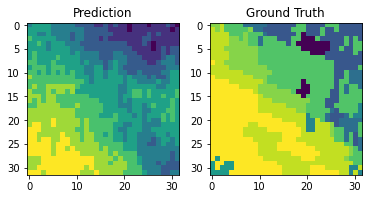

In [12]:
predictions=model.predict(test_img)
assert predictions.shape==test_lb.shape
#predicted value
sample=np.round(predictions[120]).reshape(32,32)

#Plot the corresponding label  of the testset
ground_truth=test_lb[120].reshape(32,32)

fig, ax = plt.subplots(1,2)
ax[0].imshow(sample);
ax[0].set_title('Prediction')
ax[1].imshow(ground_truth);
ax[1].set_title('Ground Truth')
plt.savefig('CNN32')


# Model structure

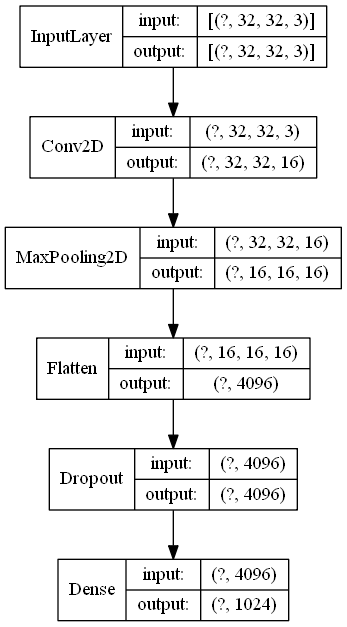

In [7]:
tf.keras.utils.plot_model(model,
                          show_shapes=True,
                          show_layer_names=False, 
                          rankdir='TB', expand_nested=True)